In [1]:
import lib
from MHNeuralState import MHNeuralState, SparseStateVector
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from scipy import stats

In [2]:
N = 2
J = 1
Gamma = 1

In [3]:
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
def normal_x(x, sigma, bounds = (float('-inf'), float('inf'))):
    new_x = round(npr.normal(x, sigma)) % (bounds[1] + 1)
    return new_x
def uniform_x(min, max):
    return npr.randint(min, max + 1)
def bitflip_x(x, N, flips):
    new_x = x
    for _ in range(flips):
        new_x = x ^ (1 << npr.randint(0, N))
    return new_x

In [4]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)

In [5]:
input = lib.generate_input_torch(N)
model_state = lib.model_to_ground_state(model, input, amp_phase)
model_state = np.squeeze(model_state.full())

In [6]:
model_MH = MHNeuralState(N, model, amp_phase, 
                         lambda x : bitflip_x(x, N, 1), 1, 10, lag = 0)

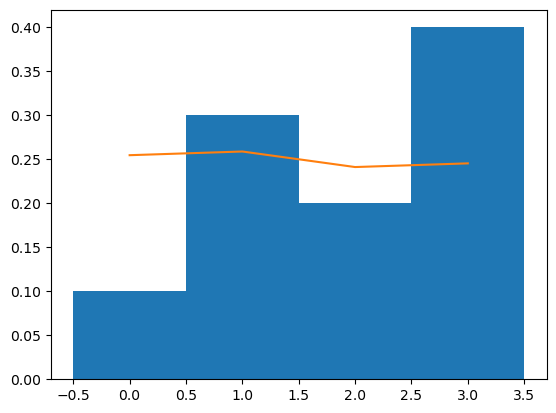

In [7]:
hist = plt.hist(model_MH.distribution_to_list(), density = True, bins = [-0.5 + n for n in range(0, 2 ** N + 1)])
model_distr = np.abs(model_state) ** 2
plt.plot([n for n in range(0, 2 ** N)], model_distr)
plt.show()

In [8]:
def calc_dist(v1, v2):
    return sum(abs(v1[i] - v2[i]) ** 2 for i in range(len(v1)))

In [9]:
calc_dist(model_MH.to_prob_distribution(N), model_distr)

np.float64(3.1081179826070674e-15)

In [10]:
calc_dist(model_MH.to_dense_vector(N), model_state)

np.float64(6.861178292183467e-14)

In [11]:
model_MH.normalize()
print(calc_dist(model_MH.to_prob_distribution(N), model_distr))

tensor(6.4393e-15, grad_fn=<AddBackward0>)


In [12]:
samples = [n for n in range(5, 105, 5)]
dists = []
for num_samples in samples:
    model_MH = MHNeuralState(N, model, amp_phase, 
                         lambda x : bitflip_x(x, N, 1), 1, num_samples, lag = 0)
    # model_MH.normalize()
    dists.append(calc_dist(model_MH.to_prob_distribution(N), model_distr).item())

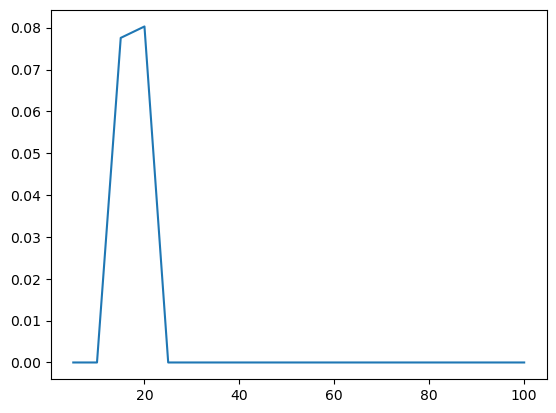

In [13]:
plt.plot(samples, dists)
plt.show()

In [14]:
N = 12
J = 1
Gamma = 1

In [15]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
input = lib.generate_input_torch(N)
model_state = lib.model_to_ground_state(model, input, amp_phase)
model_state = np.squeeze(model_state.full())
model_distr = np.abs(model_state) ** 2

In [16]:
samples = [n for n in range(10, 500, 10)]
prob_dists = []
vector_dists = []
for num_samples in samples:
    model_MH = MHNeuralState(N, model, amp_phase, 
                         lambda x : normal_x(x, 20, (0, 2 ** N - 1)), 1, num_samples, lag = 0)
    prob_dists.append(calc_dist(model_MH.to_prob_distribution(N), model_distr).item())
    vector_dists.append(calc_dist(model_MH.to_dense_vector(N), model_state))

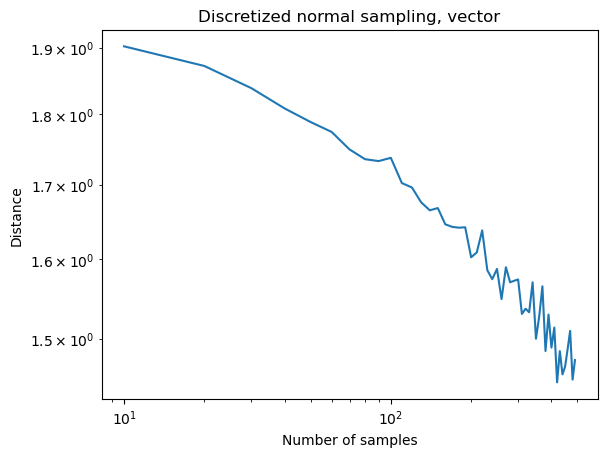

In [17]:
plt.plot(samples, vector_dists)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Distance')
plt.title('Discretized normal sampling, vector')
plt.show()

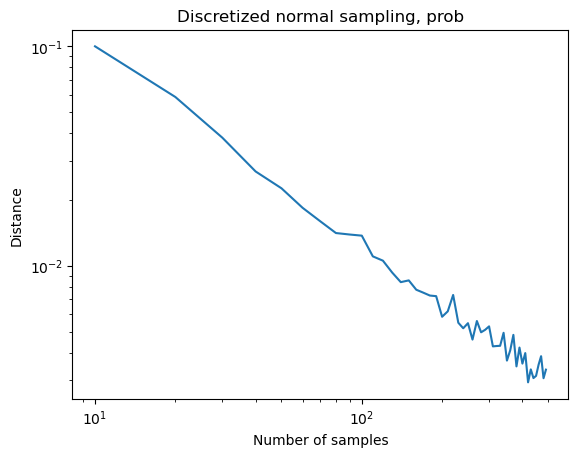

In [18]:
plt.plot(samples, prob_dists)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Distance')
plt.title('Discretized normal sampling, prob')
plt.show()

In [19]:
res = stats.linregress(np.log(samples), np.log(prob_dists))
print(res.rvalue)

-0.9932141370393737


In [20]:
samples = [n for n in range(10, 500, 10)]
prob_dists = []
vector_dists = []
for num_samples in samples:
    model_MH = MHNeuralState(N, model, amp_phase, 
                         lambda x : bitflip_x(x, N, 1), 1, num_samples, lag = 0)
    prob_dists.append(calc_dist(model_MH.to_prob_distribution(N), model_distr).item())
    vector_dists.append(calc_dist(model_MH.to_dense_vector(N), model_state))

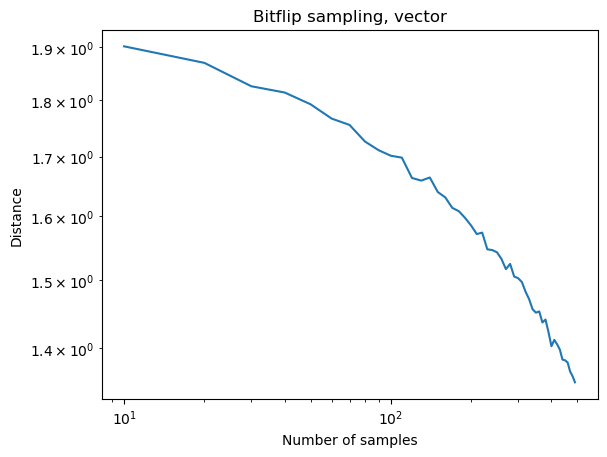

In [21]:
plt.plot(samples, vector_dists)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Distance')
plt.title('Bitflip sampling, vector')
plt.show()

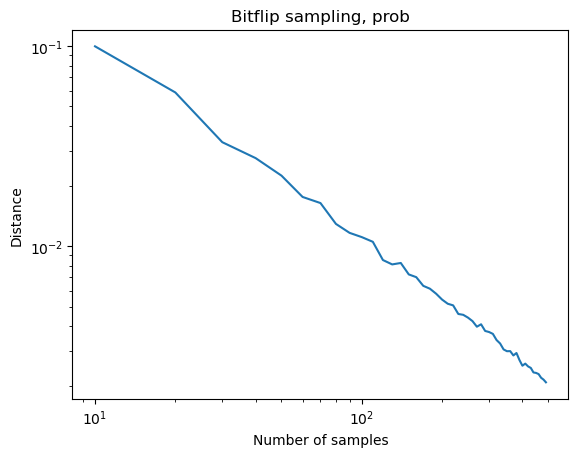

In [22]:
plt.plot(samples, prob_dists)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Distance')
plt.title('Bitflip sampling, prob')
plt.show()

In [23]:
res = stats.linregress(np.log(samples), np.log(prob_dists))
print(res.rvalue)

-0.999046830865318


In [24]:
samples = [n for n in range(10, 500, 10)]
prob_dists = []
vector_dists = []
for num_samples in samples:
    model_MH = MHNeuralState(N, model, amp_phase, 
                         lambda x : uniform_x(0, 2 ** N - 1), 1, num_samples, lag = 0)
    prob_dists.append(calc_dist(model_MH.to_prob_distribution(N), model_distr).item())
    vector_dists.append(calc_dist(model_MH.to_dense_vector(N), model_state))

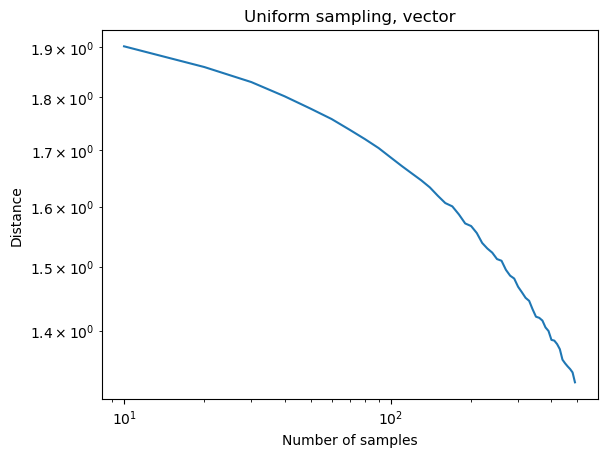

In [25]:
plt.plot(samples, vector_dists)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Distance')
plt.title('Uniform sampling, vector')
plt.show()

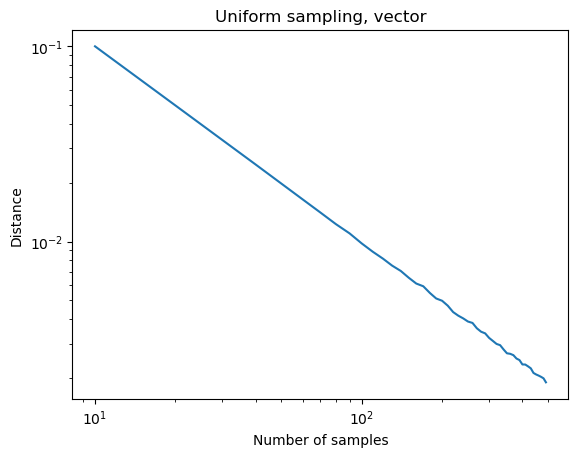

In [26]:
plt.plot(samples, prob_dists)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Distance')
plt.title('Uniform sampling, vector')
plt.show()

In [27]:
res = stats.linregress(np.log(samples), np.log(prob_dists))
print(res.rvalue)

-0.9999006031732739
